# About

The exercises in this notebook were adopted from: https://github.com/joellembatchou/SISG2022_Association_Mapping/blob/master/code/Session03_exercises.R 

# Set up

## Paths

In [1]:
DIR_MAIN = '..'

In [2]:
%%bash -s "$DIR_MAIN"
DIR_MAIN=$1

ls $DIR_MAIN

Workshop_regeneron_UNAM_AZ.docx
code
data
material
notes
slides
tools
~$rkshop_regeneron_UNAM_AZ.docx


## Tools

A list of tools: PLINK2.

In [3]:
PLINK = f'{DIR_MAIN}/tools/plink2'

In [4]:
%%bash -s "$PLINK"
PLINK=$1

$PLINK --version

PLINK v2.00a3.7 64-bit (24 Oct 2022)


In [5]:
REGENIE='/usr/local/Caskroom/miniconda/base/envs/regenie/bin/regenie'

In [6]:
%%bash -s "$REGENIE"
REGENIE=$1

$REGENIE --version

v3.2.6.gz


## Datasets

In [7]:
DIR_DATA = f'{DIR_MAIN}/data/'
D1_PHENO = f'{DIR_DATA}/sim_rels_pheno.txt'
D1_BFILE = f'{DIR_DATA}/sim_rels_geno'

D2_PHENO = f'{DIR_DATA}/bpdata.csv'

## R enviroment

In [8]:
%%bash
R --version

R version 4.3.0 (2023-04-21) -- "Already Tomorrow"
Copyright (C) 2023 The R Foundation for Statistical Computing
Platform: x86_64-apple-darwin21.6.0 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under the terms of the
GNU General Public License versions 2 or 3.
For more information about these matters see
https://www.gnu.org/licenses/.



In [9]:
 import rpy2.ipython

In [10]:
%%capture
%load_ext rpy2.ipython

In [11]:
%%R
 print('Hello World from R!')

[1] "Hello World from R!"


In [38]:
%%R
library(tidyverse)
library(data.table)

In [37]:
%%R
library(qqman)

# Association tests on `bpdata`

In [14]:
%%R -i D2_PHENO
bp = fread(D2_PHENO)
str(bp)

Classes ‘data.table’ and 'data.frame':	1000 obs. of  16 variables:
 $ V1   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sex  : chr  "FEMALE" "MALE" "FEMALE" "MALE" ...
 $ sbp  : int  171 160 142 126 126 132 136 121 120 136 ...
 $ dbp  : int  89 99 83 71 82 89 58 87 69 88 ...
 $ snp1 : chr  "CC" "TT" "CT" "CT" ...
 $ snp2 : chr  "TT" "TT" "TT" "TT" ...
 $ snp3 : chr  "TT" "CC" "TC" "CC" ...
 $ snp4 : chr  "TT" NA "CT" NA ...
 $ snp5 : chr  "CC" "CC" "CC" "CC" ...
 $ snp6 : chr  "GG" "AG" "AG" "AA" ...
 $ snp7 : chr  "AA" "AT" "TT" "TT" ...
 $ snp8 : chr  "TT" "CC" "CC" "CC" ...
 $ snp9 : chr  "TT" "CT" "TT" "TT" ...
 $ snp10: chr  "CC" "CC" "CT" "CT" ...
 $ snp11: chr  "TT" "CT" "TT" "CT" ...
 $ bmi  : int  25 35 34 32 34 25 22 33 21 29 ...
 - attr(*, ".internal.selfref")=<externalptr> 


## Exploratory plots

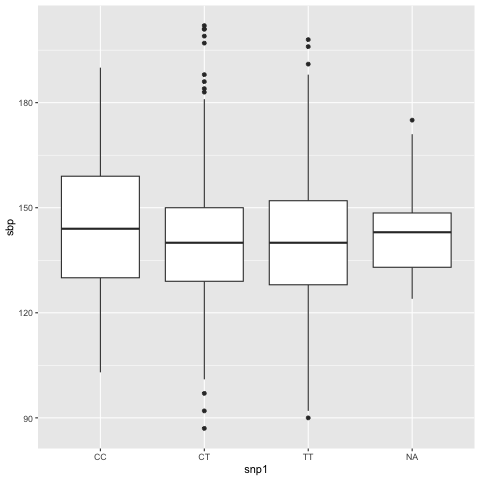

In [46]:
%%R
ggplot(bp, aes(snp1, sbp)) + geom_boxplot()

## Coding for snp3

In [35]:
%%R
# what is the minor allele?
summary(bp$snp3)

  CC   TC   TT NA's 
 621  304   35   40 


In [36]:
%%R
bp = within(bp, {
    snp3 <- factor(snp3, levels = c('CC', 'TC', 'TT'))
    g3 = as.numeric(snp3)
})
summary(bp$g3)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1.00    1.00    1.00    1.39    2.00    3.00      40 


## Additive model

In [17]:
%%R
fit_add = lm(sbp ~ g3, bp)
summary(fit_add)


Call:
lm(formula = sbp ~ g3, data = bp)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.974 -12.418  -0.974  10.582  60.582 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  137.862      1.589  86.741   <2e-16 ***
g3             2.556      1.062   2.407   0.0163 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.33 on 958 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.006014,	Adjusted R-squared:  0.004976 
F-statistic: 5.796 on 1 and 958 DF,  p-value: 0.01625



Does adjusting for covariates, e.g., sex, helps to improve the model?

In [32]:
%%R
fit_add_cov1 = lm(sbp ~ sex + g3, bp)
summary(fit_add_cov1)


Call:
lm(formula = sbp ~ sex + g3, data = bp)

Residuals:
   Min     1Q Median     3Q    Max 
-58.49 -12.90  -0.90  11.86  58.10 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  140.312      1.689  83.089  < 2e-16 ***
sexMALE       -4.762      1.175  -4.051  5.5e-05 ***
g3             2.588      1.053   2.458   0.0142 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.19 on 957 degrees of freedom
  (40 observations deleted due to missingness)
Multiple R-squared:  0.02277,	Adjusted R-squared:  0.02073 
F-statistic: 11.15 on 2 and 957 DF,  p-value: 1.631e-05



In [34]:
%%R
fit_add_cov2 = lm(sbp ~ sex + bmi + g3, bp)
summary(fit_add_cov2)


Call:
lm(formula = sbp ~ sex + bmi + g3, data = bp)

Residuals:
   Min     1Q Median     3Q    Max 
-58.83 -12.81  -0.82  11.58  57.80 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 143.21813    3.28432  43.607  < 2e-16 ***
sexMALE      -4.77580    1.17642  -4.060 5.32e-05 ***
bmi          -0.09837    0.09481  -1.038   0.2997    
g3            2.63566    1.05434   2.500   0.0126 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 18.19 on 955 degrees of freedom
  (41 observations deleted due to missingness)
Multiple R-squared:  0.02402,	Adjusted R-squared:  0.02096 
F-statistic: 7.836 on 3 and 955 DF,  p-value: 3.608e-05



# GWAS on `sim_rels`

## Exploratory data analysis before GWAS

1. What is the sample size? 
2. What is the ditribution of phenotype? 
    - Is it binary or quantitative? 
    - If it is quantitative, does the distribution look normal?

In [18]:
%%R -i D1_PHENO
phen = fread(D1_PHENO) %>% as_tibble
str(phen)

tibble [2,400 × 3] (S3: tbl_df/tbl/data.frame)
 $ FID  : int [1:2400] 2307 379 478 1545 990 1907 369 1694 2137 2314 ...
 $ IID  : int [1:2400] 2307 379 478 1545 990 1907 369 1694 2137 2314 ...
 $ Pheno: num [1:2400] 0.00999 -1.45253 0.11097 1.11363 -0.20993 ...
 - attr(*, ".internal.selfref")=<externalptr> 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


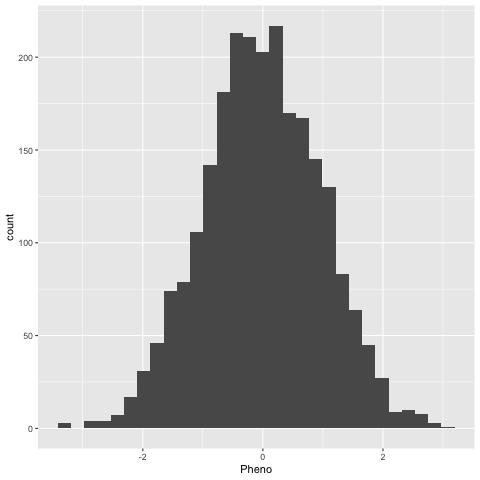

In [19]:
%%R
ggplot(phen, aes(Pheno)) + geom_histogram()

## Run GWAS using Plink

In [20]:
%%bash -s "$PLINK" "$D1_BFILE" "$D1_PHENO"
PLINK=$1
D1_BFILE=$2
D1_PHENO=$3

cmd="$PLINK --bfile $D1_BFILE 
    --pheno $D1_PHENO --pheno-name Pheno 
    --maf 0.01 --geno 0.1 --hwe 1e-10 
    --glm allow-no-covars --out gwas_plink"
eval $cmd


PLINK v2.00a3.7 64-bit (24 Oct 2022)           www.cog-genomics.org/plink/2.0/
(C) 2005-2022 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to gwas_plink.log.
Options in effect:
  --bfile ../data//sim_rels_geno
  --geno 0.1
  --glm allow-no-covars
  --hwe 1e-10
  --maf 0.01
  --out gwas_plink
  --pheno ../data//sim_rels_pheno.txt
  --pheno-name Pheno

Start time: Tue Apr 25 10:45:06 2023
16384 MiB RAM detected; reserving 8192 MiB for main workspace.
Using up to 12 threads (change this with --threads).
2400 samples (1179 females, 1221 males; 2400 founders) loaded from
../data//sim_rels_geno.fam.
106134 variants loaded from ../data//sim_rels_geno.bim.
1 quantitative phenotype loaded (2400 values).
Calculating allele frequencies... 0%61%done.
--geno: 0 variants removed due to missing genotype data.
--hwe: 0 variants removed due to Hardy-Weinberg exact test (founders only).
125 variants removed due to allele frequency threshold(s)
(--maf/--max-maf/--mac/--max

Check the output file.

In [21]:
%%bash 
head gwas_plink.Pheno.glm.linear | cut -f 3,9-12 | column -t

ID              BETA         SE         T_STAT     P
1:12000011:A:C  0.0122331    0.0437981  0.279307   0.780034
1:12000012:A:C  -0.0179816   0.0361811  -0.496988  0.619243
1:12000019:T:C  -0.0848826   0.028367   -2.99231   0.00279703
1:12000027:C:T  0.0125431    0.0434929  0.288394   0.77307
1:12000036:G:A  0.0111345    0.0287975  0.386647   0.699052
1:12000061:C:T  -0.00781173  0.0305395  -0.255791  0.798134
1:12000073:C:T  -0.12345     0.0571993  -2.15825   0.0310072
1:12000074:A:C  -0.0319143   0.0302438  -1.05523   0.291425
1:12000117:G:A  0.00668323   0.0282828  0.2363     0.81322


Read the association results into R for further analysis.

In [22]:
%%R
assoc_plink = fread('gwas_plink.Pheno.glm.linear') %>% as_tibble
str(assoc_plink)

tibble [106,009 × 13] (S3: tbl_df/tbl/data.frame)
 $ #CHROM : int [1:106009] 1 1 1 1 1 1 1 1 1 1 ...
 $ POS    : int [1:106009] 12000011 12000012 12000019 12000027 12000036 12000061 12000073 12000074 12000117 12000136 ...
 $ ID     : chr [1:106009] "1:12000011:A:C" "1:12000012:A:C" "1:12000019:T:C" "1:12000027:C:T" ...
 $ REF    : chr [1:106009] "C" "C" "C" "T" ...
 $ ALT    : chr [1:106009] "A" "A" "T" "C" ...
 $ A1     : chr [1:106009] "A" "A" "T" "C" ...
 $ TEST   : chr [1:106009] "ADD" "ADD" "ADD" "ADD" ...
 $ OBS_CT : int [1:106009] 2400 2400 2400 2400 2400 2400 2400 2400 2400 2400 ...
 $ BETA   : num [1:106009] 0.0122 -0.018 -0.0849 0.0125 0.0111 ...
 $ SE     : num [1:106009] 0.0438 0.0362 0.0284 0.0435 0.0288 ...
 $ T_STAT : num [1:106009] 0.279 -0.497 -2.992 0.288 0.387 ...
 $ P      : num [1:106009] 0.78 0.6192 0.0028 0.7731 0.6991 ...
 $ ERRCODE: chr [1:106009] "." "." "." "." ...
 - attr(*, ".internal.selfref")=<externalptr> 


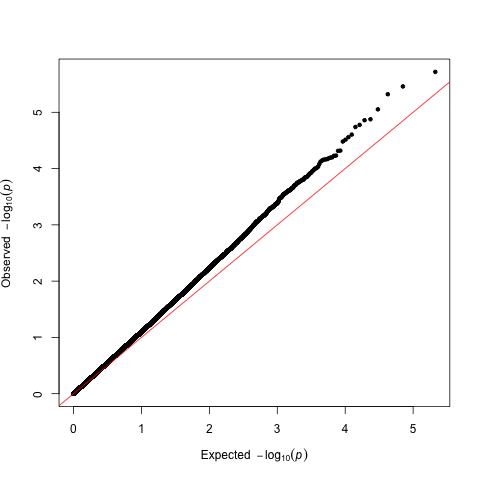

In [23]:
%%R
# qq plot by qqman
qq(assoc_plink$P)

In [24]:
%%R
median(qchisq(assoc_plink$P, df = 1, lower.tail = FALSE)) / qchisq(0.5, df = 1, lower.tail = FALSE)

[1] 1.148994


## Run GWAS using Regenie

Run Regenie Step 1 to fit the null model and obtain polygenic predictions using a leave-one-chromosome-out (LOCO) scheme.

In [25]:
%%bash -s "$REGENIE" "$D1_BFILE" "$D1_PHENO"
REGENIE=$1
D1_BFILE=$2
D1_PHENO=$3

# --maf 0.01 --geno 0.1 --hwe 1e-10
# --extract <plink_QC_pass_snplist>

cmd="$REGENIE --bed $D1_BFILE 
    --phenoFile $D1_PHENO --phenoCol Pheno 
    --qt
    --step 1 --loocv --bsize 1000  
    --out gwas_regenie"
     
eval $cmd

Start time: Tue Apr 25 10:45:08 2023

              |=============================|
              |      REGENIE v3.2.6.gz      |
              |=============================|

Copyright (c) 2020-2022 Joelle Mbatchou, Andrey Ziyatdinov and Jonathan Marchini.
Distributed under the MIT License.
Compiled with Boost Iostream library.
Using Intel MKL with Eigen.

Log of output saved in file : gwas_regenie.log

Options in effect:
  --bed ../data//sim_rels_geno \
  --phenoFile ../data//sim_rels_pheno.txt \
  --phenoCol Pheno \
  --qt \
  --step 1 \
  --loocv \
  --bsize 1000 \
  --out gwas_regenie

Fitting null model
 * bim              : [../data//sim_rels_geno.bim] n_snps = 106134
 * fam              : [../data//sim_rels_geno.fam] n_samples = 2400
 * bed              : [../data//sim_rels_geno.bed]
 * phenotypes       : [../data//sim_rels_pheno.txt] n_pheno = 1
   -dropping observations with missing values at any of the phenotypes
   -number of phenotyped individuals with no missing data = 2

Run REGENIE Step 2 to perform association testing at the same variants analyzed in PLINK.

In [26]:
%%bash -s "$REGENIE" "$D1_BFILE" "$D1_PHENO"
REGENIE=$1
D1_BFILE=$2
D1_PHENO=$3

cmd="$REGENIE --bed $D1_BFILE 
    --phenoFile $D1_PHENO --phenoCol Pheno 
    --qt
    --pred gwas_regenie_pred.list
    --step 2 --bsize 400  
    --out gwas_regenie"
     
eval $cmd

Start time: Tue Apr 25 10:45:36 2023

              |=============================|
              |      REGENIE v3.2.6.gz      |
              |=============================|

Copyright (c) 2020-2022 Joelle Mbatchou, Andrey Ziyatdinov and Jonathan Marchini.
Distributed under the MIT License.
Compiled with Boost Iostream library.
Using Intel MKL with Eigen.

Log of output saved in file : gwas_regenie.log

Options in effect:
  --bed ../data//sim_rels_geno \
  --phenoFile ../data//sim_rels_pheno.txt \
  --phenoCol Pheno \
  --qt \
  --pred gwas_regenie_pred.list \
  --step 2 \
  --bsize 400 \
  --out gwas_regenie

Association testing mode with fast multithreading using OpenMP
 * bim              : [../data//sim_rels_geno.bim] n_snps = 106134
 * fam              : [../data//sim_rels_geno.fam] n_samples = 2400
 * bed              : [../data//sim_rels_geno.bed]
 * phenotypes       : [../data//sim_rels_pheno.txt] n_pheno = 1
   -dropping observations with missing values at any of the phenoty

Read the association results into R.

In [27]:
%%R
assoc_regenie = fread('gwas_regenie_Pheno.regenie') %>% as_tibble
str(assoc_regenie)

tibble [106,134 × 13] (S3: tbl_df/tbl/data.frame)
 $ CHROM  : int [1:106134] 1 1 1 1 1 1 1 1 1 1 ...
 $ GENPOS : int [1:106134] 12000011 12000012 12000019 12000027 12000036 12000061 12000073 12000074 12000117 12000136 ...
 $ ID     : chr [1:106134] "1:12000011:A:C" "1:12000012:A:C" "1:12000019:T:C" "1:12000027:C:T" ...
 $ ALLELE0: chr [1:106134] "C" "C" "C" "T" ...
 $ ALLELE1: chr [1:106134] "A" "A" "T" "C" ...
 $ A1FREQ : num [1:106134] 0.12 0.187 0.402 0.12 0.415 ...
 $ N      : int [1:106134] 2400 2400 2400 2400 2400 2400 2400 2400 2400 2400 ...
 $ TEST   : chr [1:106134] "ADD" "ADD" "ADD" "ADD" ...
 $ BETA   : num [1:106134] -0.012356 -0.023444 -0.065985 -0.000682 0.008443 ...
 $ SE     : num [1:106134] 0.0416 0.0344 0.027 0.0413 0.0273 ...
 $ CHISQ  : num [1:106134] 0.088248 0.465507 5.97759 0.000272 0.09532 ...
 $ LOG10P : num [1:106134] 0.11553 0.30534 1.83897 0.00576 0.12061 ...
 $ EXTRA  : logi [1:106134] NA NA NA NA NA NA ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [28]:
%%R
assoc_regenie = within(assoc_regenie, P <- 10^(-LOG10P))
range(assoc_regenie$P)

[1] 2.992954e-05 9.999914e-01


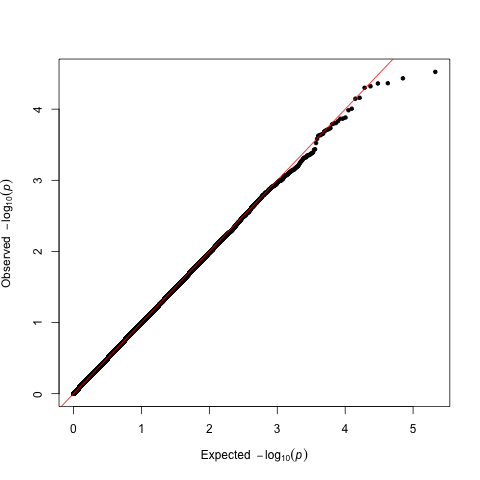

In [29]:
%%R
# qq plot by qqman
qq(assoc_regenie$P)

In [30]:
%%R
median(qchisq(assoc_regenie$P, df = 1, lower.tail = FALSE)) / qchisq(0.5, df = 1, lower.tail = FALSE)

[1] 0.9878988
